In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pipetorch import DFrame
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

#''''''''''''''''''''' Classifiers ''''''''''''''''''''''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#''''''''''''''''''''' Studies ''''''''''''''''''''''
from pipetorch.evaluate.study import Study
import optuna

In [2]:
df = pd.read_csv("Generated Datasets/ingr_pivot_lunch_diner_noten.csv").set_index("recipe")
df = df.loc[:,df.sum() > 40][df.sum(axis=1) != 0]
df

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,water,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse gehaktballetjes met room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse vegaballetjes met aardappel &amp; broccoli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#iets={'Mexicaanse rijstschotel met kip':1,'Caponata met couscous':0,'Boerenkool-knolselderijstamp met rookworstcroutons':1,'Witlof met ham en kaas uit de oven':0,'Pittige vis-courgettekoekjes':1,'Aziatisch gemarineerde varkensspies met Chinese wokgroente':1,'Varkensfilet in peper-citroenkorst met pastinaak en peen':1,'Oosterse snijbonensalade met varkenshaas':1,'Bloemkoolquiche met oude kaas':0,'Sushisandwich met rivierkreeftjes &amp: avocado':1,'Pasta met aardappel, kip en sperziebonen':1,'Briequiche met appel':0,'Paddenstoelenpasteitje':1,'Kalkoen met salie':0,'Mediterrane eendenbouten met truffelpolenta &amp; parmezaan':1,'Fluitpasta':1,'Hollandse kaasfondue':0,'Noedels met mango &amp; kip':1,'Sjalotten-geitenkaasquiche met croutons':0,'Zoetzure filetlapjes met paksoi':1,"Stéphane Reynaud's gestoofde sla":1,'Tagliatelle met zalm en avocadopesto':1,'Noedels met ijsgarnalen en mango':1,'Stoere chili':1,'Vega gehakt van tofu met mie en paksoi':0,'Gebakken kabeljauw met aardappel-komkommersalade':1,'Fattoush met pita, kruiden en tuinerwten':0,'Kip en venkel in pittige tomatensaus':1,'Lasagne met salami &amp; mozzarella':1,'Kaasquiche met tomaat':0,'Deense balletjes met ui en dille':1,'Quinoasalade met kidneybonen en feta':0, "3 tosti's met graskaas":1,"Stéphane Reynaud's gestoofde sla":1, 'Boerenkoolstamppot met uitgebakken chorizo': 1,'Vegetarische ramen met kurkuma en cavolo nero':0,'Broodje bal met augurk, piccalilly en rodekoolsalade':0,'Pilav van quinoa':1,'Visvink met spinazierisotto':1,'Verrassende kip met rozemarijnaardappeltjes':1,'Sandwich met gepocheerde kip &amp; koolsalade':1,'Spaghetti aglio e olio met verse kruiden':1,'Sticky speklapjes met rozemarijnaardappeltjes':1,"Bill Granger's saus van rauwe tomaten":0,'Gebakken bloemkoolrijst met zalm en shanghaipaksoi':1,'Brunch-garnalencocktail':1,'Pittige gehaktballetjes met snelle bami':1,'Romige spaghetti met spinazie, zalm en garnale':1,'Pasta pesto met kip':1,'Eenpanspasta met gehaktballetjes':1}
#jesse = pd.DataFrame(data=iets.items())
#jesse.rename(columns = {0:'recipe', 1:'lekker'}, inplace = True)

In [4]:
ha={'Ovenschotel met aardappel\xadpuree, gehakt &amp; bloemkoolrijst': 1,
 'Snelle tuinerwtensoep met gerookte kip en fijne tuinkruiden': 1,
 'Stoofvlees met La Trappe Quadrupel': 1,
 'Belgische stoofpot met bruin bier, wortel &amp; pastinaak ': 1,
 'Aardappeltjes met gegrilde asperges': 0,
 'Pompoenrisotto met salie en Parmezaan': 1,
 'Halloumi-salade': 0,
 'Thaise wokschotel met biefstuk': 1,
 'Zalmquiche': 1,
 "Mexicaanse taco's met vis en zoete aardappel": 1,
 'Krokante kip met sesamrijst': 1,
 'Griekse traybake met kip &amp; muntyoghurt': 1,
 'Chili con carne met rijst &amp; koffietwist': 1,
 'Wraps niçoise met tonijn': 1,
 'Pasta met gerookte makreel met venkel &amp; gremolata': 1,
 'Aardbeienjam maken': 0,
 'Groentesalade': 0,
 'Salade met malse biefstukreepjes en kaasdressing': 0,
 'Gegrilde bospeen met gember-ketjapjus': 1,
 'Spicy ribkarbonade met mangochutney': 1,
 'Bietencouscous met kip en witte kaas': 0,
 'Groentesoep met kip en rijst': 1,
 'Ravioli met gorgonzolasaus': 1,
 'Ontbijtkoek-sandwich': 0,
 "Taco's met ananas, kipdijfilet en jalapeñopeper": 0,
 'Volkorenpasta met kip, Chinese kool, gember en tahin': 1,
 'Kipburger tonnato': 1,
 'Penne met artisjok, ricotta en spek': 1,
 'Kabeljauwburger met mangochutney ': 1,
 'Entrecote bakken': 1,
 'Spaghetti met paprika en vegaballetjes': 0,
 'Goedgevulde Spaanse tomatensoep': 1,
 'Fusilli met cervelaat en champignons': 1,
 'Gevulde paprika’s met krokant kipgehakt': 0,
 'Buddhabowl met bulgur, broccolirijst en champignons': 1,
 'Schorseneren met ham en ei': 0,
 'Pizza zeevruchten en olijven': 0,
 'Spaghetti met ricotta-pestosaus &amp; krokante ham': 1,
 'Fusilli met tonijn': 1,
 'Kalkoen met ovenaardappeltjes, sperziebonen en yoghurtmayo': 1,
 'Boterham uiltjes met snoepgroente': 0,
 "Vistortilla's met kibbeling en Mexicaanse groenten": 1,
 'Spaghetti cacio e pepe': 1,
 'Vegan Fish Free sticks met ovenfriet &amp; coleslaw ': 0,
 'Visstoof met bonen': 1,
 'Stamppotje met andijvie en een gekookt ei': 0,
 'Oosterse lekkerbekjes': 1,
 'Rijst met kabeljauw en chipotlesaus': 1,
 'Champignonragout met groene asperges': 0,
 'Wokpasta met spek en paddenstoelen': 1,
 'Witlof-gehaktschotel': 0,
 'Pittige kip met paksoi en noedels': 1,
 "Pantosti 'caprese'": 1,
 'Scary stoofvleespastei': 1,
 'Limburgs zuurvlees met ontbijtkoek': 0,
 'Romige mosselen met dille': 0,
 'Kip gestoofd in witte wijn': 1,
 'Gebraden kalkoen': 1,
 'Bavette met gegrilde asperges en zoete-aardappelchips': 0,
 'Tortillaschotel met zoete aardappel, tomaat en avocado': 1,
 'Snelle bowl met bloemkoolrijst en zalm': 1,
 'Noedels met prei en aardappel': 1,
 'Noordzeetongrolletjes met zalm en dillesaus': 1,
 'Thaise scholspiesjes met kruidige rijst en wortelsalade': 1,
 'Spruitjesgratin met zoete aardappel': 0,
 'Volkorenpenne met spruitjes en ansjovis': 0,
 'Aardappelpuree met kaas, groenten en kaaskoekjes': 0,
 'Côte de boeuf van de bbq met komkommer salsa': 1,
 'Ravioli met romige tijmsaus en kaassnippers': 1,
 'Roti met kip': 1,
 'Gehaktballetjes in pittige tomatensaus uit de oven': 1,
 'Zuurkoolstamppot met truffelsalami': 0,
 'Lenteburger': 0,
 'Gezonde chili con carne': 1,
 'Ovenomelet met prei en spinazie': 1,
 'Vega arepas met bonen en salsa': 0,
 'Biefstuk met gegrilde groenten': 1,
 'Kalkoen met honing, kaneel en appel': 0,
 'Ovengnocchi met tonijn, champignons en tomaat': 1,
 'Muesli-notenbrood met komijnekaas en komkommer': 0,
 'Het perfecte roerei': 1,
 'Tonijnsteaks Hawaï met ananassalsa': 0,
 'Venkelsoep met kipgehaktballetjes': 1,
 'Pizza bianca met truffelmascarpone': 1,
 'Wraps met komkommer en zalm': 1,
 'Karbonade in zoetzure ketjapsaus': 1,
 'Jackfruitgoulash': 0,
 'Traybake van drumsticks en krieltjes': 1,
 'Aardappelsalade met gerookte zalm': 1,
 'Catalaanse worstspiesen met citroenmayonaise': 1,
 'Gebakken eendenborst met groene-peperjus van Dennis Huwaë': 1,
 'Italiaanse roerbakgroente met cannellini bonen en garnalen in tomatensaus': 1,
 'Gevuld naanbrood met kruidige kalkoenfilet': 1,
 'Kip met sinaasappel-hoisinsaus en rijst': 1,
 'Crackers met lijnzaad en pompoenpitten': 0,
 'Kerstontbijt-beschuiten': 0,
 'Vegetarische Shepherd’s pie': 0,
 'Mexicaanse tonijnwraps': 1,
 'Aardappelsalade met lamsham en lentegroenten': 1,
 'Vegetarische Mexicaanse chiliburger met groentefriet &amp; salade': 0,
 'Hamburger met gegrilde ananas': 0,
 'Noedels met ijsgarnalen en mango': 1,
 'Plaatpizza bianca &amp; rossa ': 1,
 'Quinoa met zoete tomatensaus': 1,
 'Gebakken sliptong met zelfgemaakt visspecerijenzout': 1,
 'Zeewierviskoekjes met quinoa-groenteroerbak': 1,
 'Zalmrolletjes met een salade van krieltjes en venkel': 1,
 'Spaghetti cacio e pepe met broccolisalade': 1,
 'Gewokte hoisinvarkenshaas': 1,
 'Hartverwarmende winterstoof': 1,
 'Bladerdeegpakketje met ragout, paddenstoelen en doperwten': 1,
 'Volkorenspaghetti met bietjes, peer en ricotta uit de oven': 0,
 'Pappardelle met Italiaanse ragú': 1,
 'Spaghetti met ei, vega spekreepjes &amp; geroosterde bloemkool': 0,
 "'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoarma en salade": 0,
 'Kokospannenkoekjes met vers fruit': 0,
 'Traybake met zalm, aardappel en rode ui': 1,
 'Stokbroodje met zalm en waterkers': 1,
 'Zwartebonen-rijstsalade met avocado &amp; witte kaas': 0,
 'Rijstnoedels met biefstuk, peultjes &amp; sugarsnaps': 1,
 'Caribische vis met groene pilav': 0,
 'Avocadoquinoasalade met zalm': 0,
 'Mosterdsoep met prei en ham': 1,
 'Pasta pesto met snijbonen en broccoli': 1,
 'Biefstuk met balsamico-honingsaus': 1,
 'Romige bietenrisotto met mortadella': 1,
 'Kip met rode ui, appel en mosterd': 0,
 'Pizza al tartufo': 1,
 'Sushi burrito met rivierkreeftjes': 1,
 'Macaroni al forno': 1,
 'Ovenschotel met zoete-aardappelpuree': 1,
 "Stéphane Reynaud's Provençaalse taart": 1,
 'Roerbak met scharrelkip en noedels': 1,
 'Broodje kalkoenfilet met geitenkaas &amp; zoete mosterd': 0,
 'Sandwich aardbei': 0,
 'Traybake van kip, paprika, zwarte bonen en chipotle': 1,
 'Lekkerbekjes met mosterdsaus': 1,
 'Eenpersoons leftover pasta ovenschotel': 1,
 'Risotto met tuinbonen, citroen en pecorino ': 1,
 'Noedelsoep met kip en cashewnoten': 0,
 'Pita vega gyros met rauwkost &amp; tzatziki': 0,
 'Indiase kipcurry met pompoen &amp; bloemkoolrijst': 1,
 'Spitskoolsoep met prosciuttoperline': 1,
 'Duitse gehakt-ansjovisballetjes': 1,
 'Linzensalade met biet en geitenkaas ': 0,
 'Lasagne met kip, spinazie en courgette': 0,
 'Malse kip, groene groenten en aardappelpartjes': 1,
 'Varkensfiletreepjes met kerriebloemkool en knolselderijpuree': 1,
 'Stromboli': 1,
 'Burger à la pizzaiola': 1,
 'Zomerse pastabowl': 1,
 'Bami met balletjes': 1,
 'Volkorenpastasalade met mozzarellabolletjes, sojabonen, tonijn en komkommer': 1,
 'Boerenerwtensoep met bacon': 1,
 'Kipquiche met courgette': 0,
 'Turkse dürüm döner': 1,
 'Makreel van de BBQ': 1,
 'Snelle spaghetti met paddenstoelen en spekjes': 1,
 'Pokébowl tonijn': 1,
 'Gebakken kabeljauw met bloemkoolpuree ': 1,
 'Aspergesalade met gegrilde romaine': 0,
 'Pappardelle met gorgonzola': 0,
 'Kamutspaghetti met pecorino en pesto': 1,
 'Portugese kabeljauw met paprika': 1,
 'Zalmpakketje met prei uit de oven': 1,
 'Thaise kokossoep met kip en noedels': 1,
 'Spaanse bonenschotel met vis': 1,
 'Gebakken zalm met frisse venkelsalade': 0,
 'Courgette met linzen en geitenkaas': 0,
 'Farfalle met rivierkreeftjes en gremolata': 1,
 'Broccolisalade met kibbeling': 1,
 'Dan dan-noedels met choisum': 1,
 'Chow mein': 1,
 'Koolhydraatarme sandwich': 0,
 'Pastasalade met groene groenten': 0,
 'Salade met mungbonen en groene asperges': 0,
 'Farrosalade met gedroogde tomaat en basilicumpesto': 0,
 'Biefstuk met tuinkruidenboter': 1,
 'Gegrilde wraps met pulled makreel': 1,
 'Gevulde varkenshaas': 1,
 'Indiase curry met biefstukpuntjes': 1,
 'Ravioli met aubergine en kruiden': 0,
 'Snelle kip tikka masalasalade': 1,
 'Fusilli met gehaktballetjes en courgette': 0,
 'Franse visstoof met zalm en mosselen': 0,
 'Lamskoteletjes met pittige salsa': 1,
 'Quinotto met paddenstoelen en knolselderij': 1,
 'Filetlapjes in sojasaus': 1,
 'Zelfgemaakte surimisalade': 1,
 'Volkorentonijnsandwich': 0,
 'Bami goreng met spekjes': 1,
 'Vispakketjes met citroengras': 1,
 'Citroenzalm &amp; aardappelgratins met geroosterde tomaatjes ': 1,
 "Dave Myers &amp; Si King's kruidige cajunkip met aardappelpartjes en bieslookdip": 1,
 'Omelet met zoetzure saus': 1,
 'Wokschotel met puntpaprika en kibbeling': 1,
 'Karbonade in karnemelksaus': 0,
 'Kerstboompasteitjes': 1,
 'Preistamppot met runderballetjes in kerriesaus': 1,
 'Hartige spek-broccolipannenkoeken': 1,
 'Zuurkoolstamp met rookworstcroutons ': 0,
 'Volkorensandwich met rode ui, spinazie en cottage cheese': 0,
 "Piadinetosti's met pesto": 1,
 'Frittata met groene groenten en feta': 0,
 'Aziatische noedelsalade met tofu': 1,
 'Sinaasappelcouscous met kabeljauw en venkel': 1,
 'Kerstham met dille': 1,
 'Lasagne met roomsaus': 1,
 'Snelle Mexicaanse bonenschotel': 1,
 'Zaanse kaasfondue': 0,
 'Beefburger op groentebroodje': 1,
 'Koningsburger met zoete aardappelfriet': 1,
 'Mosselen met paprika en olijven': 0,
 "Bietenhummus met yoghurt, komkommer en za'atar": 0,
 'Kipnuggets': 1,
 "Erik van Loo's zuurvlees": 0,
 'Tajine van konijnenbout met kaneel en abrikoos': 0, 'Mexicaanse rijstschotel met kip':1,'Caponata met couscous':0,'Boerenkool-knolselderijstamp met rookworstcroutons':1,'Witlof met ham en kaas uit de oven':0,'Pittige vis-courgettekoekjes':1,'Aziatisch gemarineerde varkensspies met Chinese wokgroente':1,'Varkensfilet in peper-citroenkorst met pastinaak en peen':1,'Oosterse snijbonensalade met varkenshaas':1,'Bloemkoolquiche met oude kaas':0,'Sushisandwich met rivierkreeftjes &amp: avocado':1,'Pasta met aardappel, kip en sperziebonen':1,'Briequiche met appel':0,'Paddenstoelenpasteitje':1,'Kalkoen met salie':0,'Mediterrane eendenbouten met truffelpolenta &amp; parmezaan':1,'Fluitpasta':1,'Hollandse kaasfondue':0,'Noedels met mango &amp; kip':1,'Sjalotten-geitenkaasquiche met croutons':0,'Zoetzure filetlapjes met paksoi':1,"Stéphane Reynaud's gestoofde sla":1,'Tagliatelle met zalm en avocadopesto':1,'Noedels met ijsgarnalen en mango':1,'Stoere chili':1,'Vega gehakt van tofu met mie en paksoi':0,'Gebakken kabeljauw met aardappel-komkommersalade':1,'Fattoush met pita, kruiden en tuinerwten':0,'Kip en venkel in pittige tomatensaus':1,'Lasagne met salami &amp; mozzarella':1,'Kaasquiche met tomaat':0,'Deense balletjes met ui en dille':1,'Quinoasalade met kidneybonen en feta':0, "3 tosti's met graskaas":1,"Stéphane Reynaud's gestoofde sla":1, 'Boerenkoolstamppot met uitgebakken chorizo': 1,'Vegetarische ramen met kurkuma en cavolo nero':0,'Broodje bal met augurk, piccalilly en rodekoolsalade':0,'Pilav van quinoa':1,'Visvink met spinazierisotto':1,'Verrassende kip met rozemarijnaardappeltjes':1,'Sandwich met gepocheerde kip &amp; koolsalade':1,'Spaghetti aglio e olio met verse kruiden':1,'Sticky speklapjes met rozemarijnaardappeltjes':1,"Bill Granger's saus van rauwe tomaten":0,'Gebakken bloemkoolrijst met zalm en shanghaipaksoi':1,'Brunch-garnalencocktail':1,'Pittige gehaktballetjes met snelle bami':1,'Romige spaghetti met spinazie, zalm en garnale':1,'Pasta pesto met kip':1,'Eenpanspasta met gehaktballetjes':1}
jesse = pd.DataFrame(data=ha.items())
jesse.rename(columns = {0:'recipe', 1:'lekker'}, inplace = True)
jesse

,recipe,lekker
0,"Ovenschotel met aardappel­puree, gehakt &amp; ...",1
1,Snelle tuinerwtensoep met gerookte kip en fijn...,1
2,Stoofvlees met La Trappe Quadrupel,1
3,"Belgische stoofpot met bruin bier, wortel &amp...",1
4,Aardappeltjes met gegrilde asperges,0
...,...,...
260,Brunch-garnalencocktail,1
261,Pittige gehaktballetjes met snelle bami,1
262,"Romige spaghetti met spinazie, zalm en garnale",1
263,Pasta pesto met kip,1


In [5]:
jesse_ingr = pd.merge(df,jesse, how= 'inner',left_on= 'recipe', right_on = 'recipe')
jesse_ingr = jesse_ingr.set_index('recipe')
jesse_ingr

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout,lekker
recipe,,,,,,,,,,,,,,,,,,,,,
'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoarma en salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3 tosti's met graskaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"Aardappelpuree met kaas, groenten en kaaskoekjes",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Aardappelsalade met gerookte zalm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aardappelsalade met lamsham en lentegroenten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoetzure filetlapjes met paksoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
Zomerse pastabowl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Zuurkoolstamp met rookworstcroutons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
X = jesse_ingr.iloc[:,:-1]
y = jesse_ingr.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)#, random_state=42)

In [19]:
X_train

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,water,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout
recipe,,,,,,,,,,,,,,,,,,,,,
"Lasagne met kip, spinazie en courgette",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zaanse kaasfondue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kip gestoofd in witte wijn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kamutspaghetti met pecorino en pesto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Snelle spaghetti met paddenstoelen en spekjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oosterse lekkerbekjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caponata met couscous,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Hartverwarmende winterstoof,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model comparison

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score

In [33]:
def model_comparison(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return model.__class__.__name__, f1, recall, precision, accuracy

In [34]:
results = []
for m in [LogisticRegression(multi_class='multinomial', solver = 'lbfgs'), tree.DecisionTreeClassifier(max_depth = 10), KNeighborsClassifier()]:
    # run experiment and store the returned values in r
    r = model_comparison(m, X_train, y_train, X_test, y_test)
    
    results.append(r)

In [35]:
pd.DataFrame(results, columns=['model', 'recall', 'precision', 'accuracy', 'f1'])

,model,recall,precision,accuracy,f1
0,LogisticRegression,0.769231,0.714286,0.833333,0.660377
1,DecisionTreeClassifier,0.853933,0.904762,0.808511,0.754717
2,KNeighborsClassifier,0.827586,0.857143,0.800000,0.716981


#Import Decision Tree Classifier
from sklearn import tree

#Create and fit Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)

#Create predictions of Decision Tree Classifier
clf_y_pred =  clf.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, clf_y_pred))
print(classification_report(y_test, clf_y_pred))

In [37]:
#Import K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Create and fit K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

#Create predictions of K Neighbors Classifier
knn_y_pred =  knn.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

[[ 4  7]
 [17 25]]
              precision    recall  f1-score   support

           0       0.19      0.36      0.25        11
           1       0.78      0.60      0.68        42

    accuracy                           0.55        53
   macro avg       0.49      0.48      0.46        53
weighted avg       0.66      0.55      0.59        53



In [38]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#Create and fit Logistic Regression
lgr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs').fit(X_train, y_train)

#Create predictions of Logistic Regression
lgr_y_pred =  lgr.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, lgr_y_pred))
print(classification_report(y_test, lgr_y_pred))

[[ 5  6]
 [12 30]]
              precision    recall  f1-score   support

           0       0.29      0.45      0.36        11
           1       0.83      0.71      0.77        42

    accuracy                           0.66        53
   macro avg       0.56      0.58      0.56        53
weighted avg       0.72      0.66      0.68        53



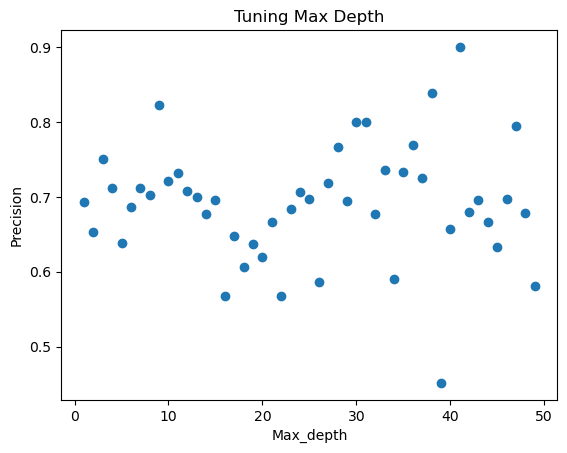

In [39]:
acc_list = []
md_list = []
def max_depth_accuracy_scores(depth):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size = 0.8)
    for i in range(0, 100): 
        global acc_list
        global md_list
        model = DecisionTreeClassifier(max_depth = depth)
        model.fit(train_X, train_y)
        y_pred = model.predict(valid_X)
        acc = precision_score(valid_y, y_pred)
        mean_acc = []
        mean_acc.append(acc)
    return np.mean(mean_acc), depth

for i in range(1, 50):
    value = max_depth_accuracy_scores(i)
    acc_list.append(value[0])
    md_list.append(value[1])

_ = plt.scatter(md_list, acc_list)
_ = plt.xlabel('Max_depth')
_ = plt.ylabel('Precision')
_ = plt.title('Tuning Max Depth')
plt.show()

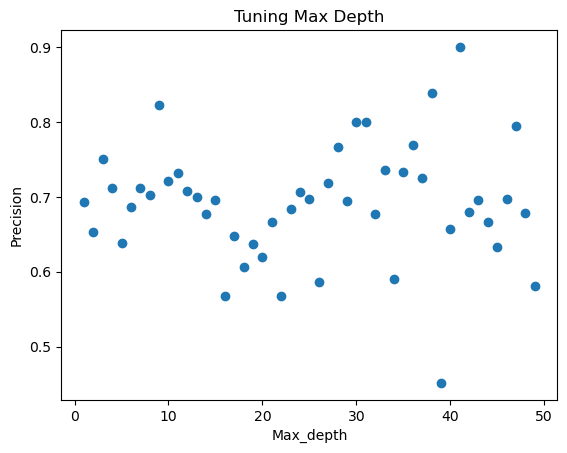

In [40]:
_ = plt.scatter(md_list, acc_list)
_ = plt.xlabel('Max_depth')
_ = plt.ylabel('Precision')
_ = plt.title('Tuning Max Depth')
plt.show()

In [55]:
study = optuna.create_study(direction="maximize")

def trial(trial):
    gem_pr = []
    for i in range(100):
        train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size = 0.8)
        depth = trial.suggest_categorical("max_depth", range(1, 51))
        msl = trial.suggest_categorical("min_samples_leaf", range(1, 11))
        model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = msl)
        model.fit(X_train, y_train)
        pr_valid = precision_score(y_test, model.predict(X_test))
        gem_pr.append(pr_valid)
        return np.mean(gem_pr)

study.optimize(trial, n_trials = 100)

[I 2023-01-02 19:13:21,827] A new study created in memory with name: no-name-3e633970-95c3-4f69-ac84-a09e21a25843
[I 2023-01-02 19:13:21,836] Trial 0 finished with value: 0.8 and parameters: {'max_depth': 35, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8.
[I 2023-01-02 19:13:21,842] Trial 1 finished with value: 0.82 and parameters: {'max_depth': 41, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.82.
[I 2023-01-02 19:13:21,848] Trial 2 finished with value: 0.82 and parameters: {'max_depth': 21, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.82.
[I 2023-01-02 19:13:21,854] Trial 3 finished with value: 0.8125 and parameters: {'max_depth': 44, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.82.
[I 2023-01-02 19:13:21,860] Trial 4 finished with value: 0.8125 and parameters: {'max_depth': 50, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.82.
[I 2023-01-02 19:13:21,866] Trial 5 finished with value: 0.8043478260869565 and parameters: {'max_depth': 35, 'mi

In [56]:
optuna.visualization.plot_slice(study)


In [50]:
lijst = list(jesse_ingr.index)
X_valid = df.drop(lijst, axis=0)
y_valid = pd.DataFrame(data = ['Nan']*len(X_valid))


In [51]:
y_valid

,0
0,Nan
1,Nan
2,Nan
3,Nan
4,Nan
...,...
4349,Nan
4350,Nan
4351,Nan
4352,Nan


In [52]:
X_valid

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,water,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse gehaktballetjes met room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweedse vegaballetjes met aardappel &amp; broccoli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
model = DecisionTreeClassifier(max_depth = 43, min_samples_leaf = 3)
model.fit(X_train, y_train)
y_valid = model.predict(X_valid)
y_valid

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
X_valid['lekker']= y_valid
X_valid

,(arachide)olie,(olijf)olie,Franse mosterd,Griekse yoghurt,Japanse sojasaus,Parmezaanse kaas,Parmigiano Reggiano,Pecorino Romano (kaas),Tasty Tom trostomaat,aardappelen,...,winterpeen,witlof,witte kaas 45+,witte rijst,zilvervliesrijst,zoete aardappel,zoete chilisaus,zonnebloemolie,zout,lekker
recipe,,,,,,,,,,,,,,,,,,,,,
Andijviestamppot met gebakken salami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Libanese wraps met appel-koolsalade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Plaattaart met gegrilde groenten en witte kaas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Zalmspies met sojaglaze van de BBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
&amp;Suus’ buik-weg-salade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Zweedse gehaktballetjes met room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Zweedse vegaballetjes met aardappel &amp; broccoli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [61]:
lekker_recp = X_valid[X_valid['lekker']==1]
lekker_recp.index

Index([' Andijviestamppot met gebakken salami',
       ' Libanese wraps met appel-koolsalade',
       ' Plaattaart met gegrilde groenten en witte kaas',
       ' Zalmspies met sojaglaze van de BBQ', '&amp;Suus’ buik-weg-salade',
       ''Burrito'-schotel met knapperige tortillapuntjes',
       ''Leeuwenkoppen' van gehakt en kool', ''Marokkaanse' lamsbout',
       ''Mexicaanse' bonensoep met quesadillas', ''Pho' met mihoen en ribeye',
       ...
       'Zwarte-bonenstoof met feta', 'Zwarte-bonenstoof met feta ',
       'Zwartebonenchili met kip', 'Zwartebonenstoof met tofu en gordita's',
       'Zweedse balletjes', 'Zweedse gehaktballetjes',
       'Zweedse gehaktballetjes met room',
       'Zweedse vegaballetjes met aardappel &amp; broccoli',
       'Zwitserse kaasfondue', '‘Nasi’ met Hollandse soepgroente'],
      dtype='object', name='recipe', length=3265)